In [2]:
from scipy import io
from scipy.stats import mode
from heapq import nsmallest
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def sigma(x):
    return 1.0/(1+np.exp(-x))
def sigma_prime(x):
    return np.exp(-x)/(1+np.exp(-x))**2

In [4]:
def F_h(W2,W1,b2,b1,x_i):
    #x_i is single input dimension-1 value, W1,b1 is dimension k column vector(dealt with as a row vector), 
    #W2 is dimension k row vector and b2 is a value
    k = len(W2)
    #first layer prediction-a k vector
    z_1 = W1*x_i+b1
    F_1 = sigma(z_1)
    #second layer prediction-a real value
    z_2 = sum(W2*F_1)+b2
    F_2 = sigma(z_2)
    return z_1,z_2,F_1,F_2


In [5]:
def partial_E(X_Y, W2, W1, b2, b1):
    k = len(W2)
    p_b2 = 0
    p_W2 = np.zeros(k)
    p_W1 = np.zeros(k)
    p_b1 = np.zeros(k)
    n = len(X_Y)
    for i in range(n):
        x_i = X_Y[i,0]
        y_i = X_Y[i,1]
        z_1,z_2,F_1,F_2 = F_h(W2,W1,b2,b1,x_i)
        p_W2+=(F_2-y_i)*sigma_prime(z_2)*F_1/n
        p_b2+=(F_2-y_i)*sigma_prime(z_2)/n
        p_W1+=(F_2-y_i)*sigma_prime(z_2)*x_i*(W2*sigma_prime(z_1))/n
        p_b1+=(F_2-y_i)*sigma_prime(z_2)*(W2*sigma_prime(z_1))/n
    return p_W2,p_b2,p_W1,p_b1

In [6]:
Matrix = io.loadmat('C:\Users\lhren\Desktop\Fall 2017/4771\hw\hw2\hw2data.mat')
X_Y = np.concatenate((Matrix['X'],Matrix['Y']),axis=1)
np.random.shuffle(X_Y)
X_Y = np.array(X_Y)
N = len(X_Y)

In [7]:
def Network_k(X_Y,k):
    N = len(X_Y)
    T = 5000
    b1 = np.zeros(k)
    W1 = np.zeros(k)
    b2 = 0
    W2 = np.zeros(k)
    E_list = []
    E = 1
    #dE = 1
    t = 0
    eta = 1
    while abs(E)>1e-3 and t<T:
        #E_old = E
        if t%20==0:
            print t
        E = 0
        for j in range(N):
            x_i = X_Y[j,0]
            y_i = X_Y[j,1]
            z_1,z_2,F_1,F_2 = F_h(W2,W1,b2,b1,x_i)
            E+=(F_2-y_i)**2/(2.0*N)
        E_list.append(E)
        p_W2,p_b2,p_W1,p_b1 = partial_E(X_Y, W2, W1, b2, b1)
        W2-=eta*p_W2
        W1-=eta*p_W1
        b2-=eta*p_b2
        b1-=eta*p_b1
        #dE = abs(E-E_old)
        t+=1
    return W2,W1,b2,b1,E_list
        

In [ ]:
W2,W1,b2,b1,E_list = Network_k(X_Y,20)

0
20
40
60
80
100
120
140
160
180
200
220
240


In [1]:
t = len(E_list)
plt.plot(range(t),np.array(E_list))
plt.xlabel('Iterations')
plt.ylabel('Error function E')

NameError: name 'E_list' is not defined

In [142]:
E_list[-10:-1]

[0.0071564133059594543,
 0.0073254661475778199,
 0.0071559803036569964,
 0.0073249819751179468,
 0.0071555476303129476,
 0.0073244982197629045,
 0.0071551152855613776,
 0.0073240148809995721,
 0.0071546832690370498]

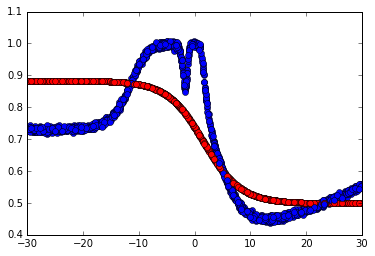

In [138]:
for i in range(N):
    x_i = X_Y[i,0]
    y_i = X_Y[i,1]
    z_1,z_2,F_1,F_2 = F_h(W2,W1,b2,b1,x_i)
    plt.plot(x_i,F_2,'ro')
    plt.plot(x_i,y_i,'bo')
